In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/Task 3 and 4_Loan_Data.csv')
df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


In [2]:
fico_scores = df['fico_score'].values
fico_scores

array([605, 572, 602, ..., 596, 647, 757])

In [3]:
!pip install sns

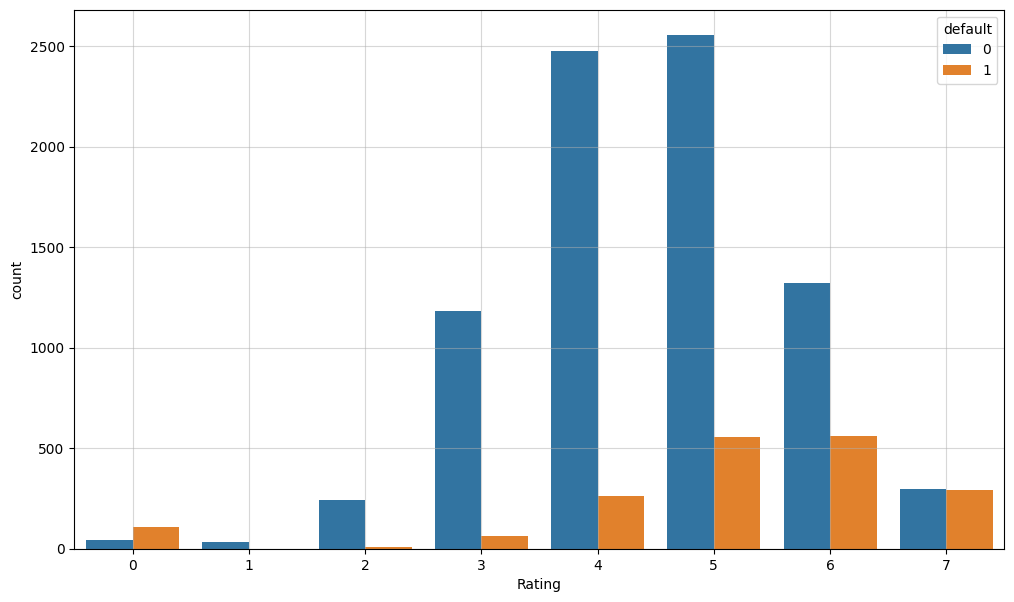

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

rating = {range(800,851):1,range(750,800):2,range(700,750):3, range(650,700):4,range(600,650):5,range(550,600):6, range(500,550):7, range(350-500):8 }
df['Rating'] = df['fico_score'].apply(lambda x: next((v for k, v in rating.items() if x in k), 0))
df.groupby('fico_score')['default']

plt.figure(figsize=(12,7))
sns.countplot(x=df['Rating'],hue=df['default'])
plt.grid(alpha=0.5)
plt.show()

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X = df[['Rating']]  # Features
y = df['default']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]
predictions_df = pd.DataFrame({'Rating': X_test['Rating'], 'Probability to Default': y_pred_prob})

rating_pd_mapping = dict(zip(predictions_df['Rating'], predictions_df['Probability to Default']))
df['Probability to Default'] = df['Rating'].map(rating_pd_mapping)

df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,Rating,Probability to Default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,5,0.198672
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,6,0.270442
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,5,0.198672
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,5,0.198672
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,5,0.198672
...,...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0,4,0.142235
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0,5,0.198672
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0,6,0.270442
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0,5,0.198672
